In [22]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, CSV, DataFrames;

In [23]:
df = CSV.File("../data/Xavier-diode5.csv") |> DataFrame

,VK,IK,JK,LOGVK,LOGJK,LNJK,der,eta
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.017,5.63e-11,2.82e-5,-1.76955,-4.55021,-10.4773,46.2255,0.836119
2,0.033,1.19e-10,5.96e-5,-1.48149,-4.2249,-9.72819,38.2633,1.01011
3,0.05,2.03e-10,0.00010137,-1.30103,-3.99409,-9.19673,29.8035,1.29683
4,0.067,2.98e-10,0.00014917,-1.17393,-3.82632,-8.81042,23.0694,1.67538
5,0.084,4.28e-10,0.000214205,-1.07572,-3.66917,-8.44858,19.8362,1.94846
6,0.1,5.74e-10,0.0002869,-1.0,-3.54227,-8.15638,18.4366,2.09637
7,0.117,7.7e-10,0.000384885,-0.931814,-3.41467,-7.86257,17.4724,2.21207
8,0.134,1.03e-9,0.000517075,-0.872895,-3.28645,-7.56732,16.7371,2.30924
9,0.15,1.36e-9,0.000680405,-0.823909,-3.16723,-7.29282,16.1294,2.39624


Pentacene from Xavier's thesis

In [24]:
semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.7, # Fermi level (eV)
0.071, # Intrinsic semiconductor's gaussian width (eV)
0.07, # Doping states' gaussian width (eV)
);
F = -5.3e4;

T = 300;
F = df.VK[25:1:37] ./ (150e-7);

`F_reduced` is the range in which the fig. 43 was plot.

In [25]:
simulation_res = (x -> Conduction.overallEin(semiconductor, T, -x, 15)).(F)

13-element Array{Float64,1}:
 0.08776033234957005
 0.08777435489271199
 0.08778941538181302
 0.087799366164846
 0.08781364504147034
 0.08782704109666319
 0.08784377261442787
 0.0878579298136491
 0.08787141674257459
 0.0878864076889179
 0.087901330151161
 0.0879159247088925
 0.08793455554349475

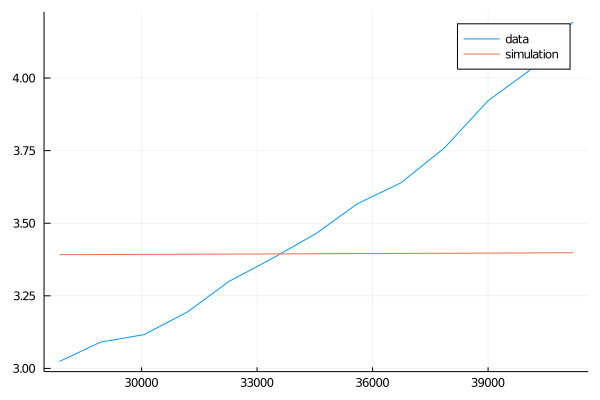

In [26]:
plot([F], [df.eta[25:1:37], simulation_res ./ (Conduction.k * T / Conduction.q)], label=["data" "simulation"])

It seems that the real datas and the simulation have the same tendency even though there is a constant shift.

In [ ]:
coeff = (simulation_res[2] - simulation_res[1]) / (F_reduced[2] - F_reduced[1])

3.0446043649652514e-6

In [ ]:
semiconductor.Ni = 3e19;

simulation_res = f.(F_reduced)

2-element Array{Float64,1}:
 0.11681621149473677
 0.5852492195886312

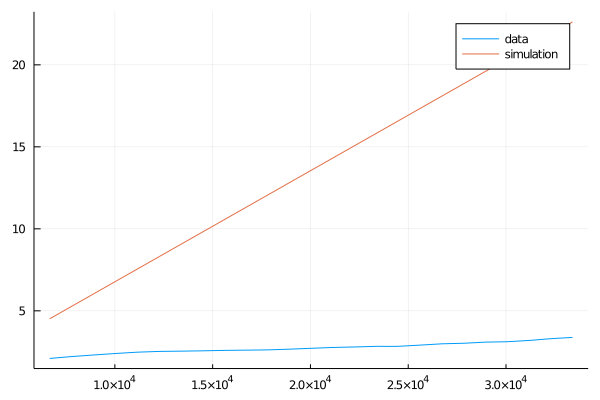

In [ ]:
plot([F, F_reduced], [df.eta[range], simulation_res / (Conduction.k * T / Conduction.q)], label = ["data" "simulation"])


In [ ]:
coeff = (simulation_res[2] - simulation_res[1]) / (F_reduced[2] - F_reduced[1])

1.7522431724210515e-5

It seems that lowering $N_i$ increases the slope of the eta value.

In [ ]:
semiconductor.Ni = 3e21;
semiconductor.alpha = 7e7;

simulation_res = f.(F_reduced)

2-element Array{Float64,1}:
 0.021303066497104447
 0.10672836315049329

In [ ]:
coeff = (simulation_res[2] - simulation_res[1]) / (F_reduced[2] - F_reduced[1])

3.1954599745656677e-6

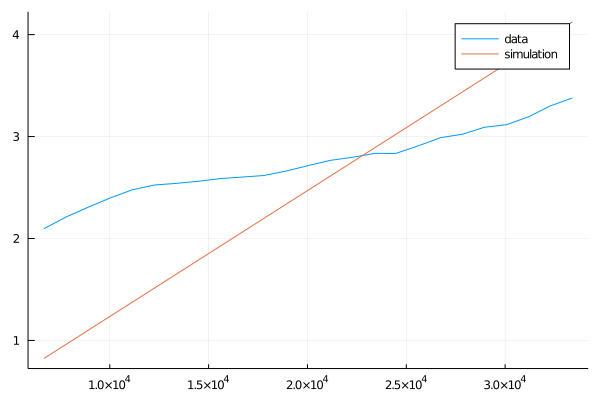

In [ ]:
plot([F, F_reduced], [df.eta[range], simulation_res / (Conduction.k * T / Conduction.q)], label = ["data" "simulation"])

$\alpha$ seems not to change so much the final values but the new $\alpha$ value was not so different compared to the initial one.